# **Прайсинг кроссовок**
## **Explorotary Data Analysis**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def obrabotka(df):
    df.drop('url', axis=1, inplace=True) #дропаем колонку с ссылками
    df = df[df['days_since_release'] >= 0] #не рассматриваем кроссовки, которые еще не вышли
    df = df[df['price'].notna()] #дропаем кроссовки, у которых нет цены
    df.reset_index(drop=True, inplace=True) 
    df['technology'] = df['technology'].fillna('Basic') #заполняем пустые значения в колонке technology
    df['upper_material'] = df['upper_material'].fillna('Unknown') #заполняем пустые значения в колонке upper_material
    df = df[df['gender'] != 'youth'] 
    return df

In [3]:
data = pd.read_csv('goat_parsed.csv')
data = obrabotka(data) #обработали 

Проверим потенциально самую опасную категориальную переменную - пол, потому что выборка может быть очень сильно смещена 

In [4]:
data.groupby('gender').agg({'price' : 'count'}).rename(columns={'price': 'count'}).reset_index()

,gender,count
0,men,648
1,women,35


Как видим, получаем сразу дисбаланс классов, выборка скошенная, проблема в том, что во время парсинга самых популярных по годам женских экземпляров было мало в первых 20-30 кроссовках для каждого года, поэтому необходимо было спарсить еще женских кроссовок

In [5]:
data2 = pd.read_csv('goat_parsed_women.csv')
data2 = obrabotka(data2) #и эту штучку обработали 
data_full = pd.concat([data, data2], ignore_index=True) #объединили две таблицы
data_full.drop_duplicates('model', inplace=True) #дропнули дубликаты
data_full.reset_index(drop=True, inplace=True) #сбросили индексы
data_full

,release_date,brand_name,model,gender,len_colorway,main_color,upper_material,technology,len_size,unique,price,days_since_release
0,1985-09-14,Air Jordan,Air Jordan 1 High 'Chicago' 1985,men,3,Red,Leather,Air,39,0,50990.0,14476
1,1985-09-14,Air Jordan,Air Jordan 1 High 'Bred' 1985,men,2,Black,Leather,Air,39,0,31398.0,14476
2,1985-09-14,Air Jordan,Air Jordan 1 High 'Royal' 1985,men,3,Black,Leather,Air,39,0,2642.0,14476
3,1985-09-14,Air Jordan,Air Jordan 1 High 'Natural Grey' 1985,men,3,White,Leather,Air,39,0,2632.0,14476
4,1985-01-01,Air Jordan,Air Jordan 1 High OG 'Black Toe' 1985,men,4,Black,Leather,Air,39,0,9705.0,14732
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,2025-04-01,adidas,Wmns Taekwondo 'Clear Pink Satin',women,5,Pink,Satin,Basic,26,0,140.0,34
1025,2025-03-01,Puma,Wmns Speedcat Ballet 'Metallic - Silver',women,2,Silver,Leather,Basic,24,0,105.0,65
1026,2025-02-02,adidas,Wmns Gazelle Bold 'Clear Mint Lucid Blue Satin',women,6,Green,Satin,Basic,26,0,144.0,92
1027,2025-03-20,Onitsuka Tiger,Wmns Mexico 66 TGRS 'Crystal Pink',women,4,Pink,Leather,Basic,23,0,309.0,46


In [6]:
data_full.describe()

,len_colorway,len_size,unique,price,days_since_release
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,4.141885,34.500486,0.069971,1646.879495,4401.116618
std,1.631787,7.074867,0.255222,11816.964182,3210.676903
min,0.000000,8.000000,0.000000,35.000000,2.000000
25%,3.000000,26.000000,0.000000,135.000000,1729.000000
50%,4.000000,39.000000,0.000000,316.000000,3845.000000
75%,5.000000,39.000000,0.000000,613.000000,6697.000000
max,11.000000,41.000000,1.000000,300589.000000,14732.000000


In [7]:
data_full.groupby('gender').agg({'price' : 'count'}).rename(columns={'price': 'count'}).reset_index()

,gender,count
0,men,645
1,women,384



Изначально наша выборка была очень сильне смещена, поскольку из всех кроссовок, собранных со вкладки популярные, всего 35 из 683 были женские. Поэтому мы отдельно зашли на влкадку "women" и спарсили от туда все возможные пары. Теперь мужских/женских - 645/384, что более репрезентативно, несмотря на то что женских все еще меньше, мужские кроссовки часто выступают как унисекс и их могут покупать оба гендера 

[Text(0.5, 1.0, 'Gender Distribution'),
 Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Count')]

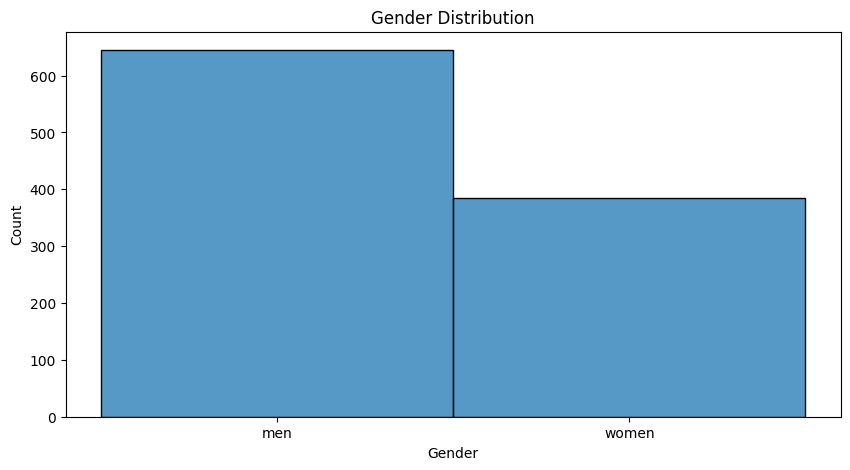

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data_full['gender'], bins=2, ax=ax).set(title='Gender Distribution', xlabel='Gender', ylabel='Count')


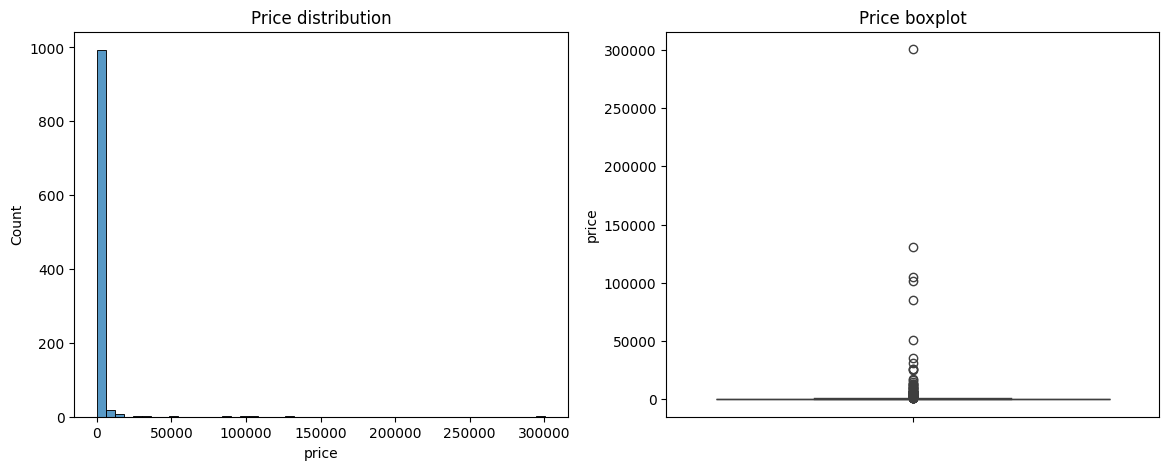

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data_full['price'].dropna(), bins=50, ax=axes[0])
axes[0].set_title('Price distribution')

sns.boxplot(y=data_full['price'], ax=axes[1])
axes[1].set_title('Price boxplot')
plt.show()


Проверим распределение log-price

In [10]:
data_full['log_price'] = np.log(data_full['price'])

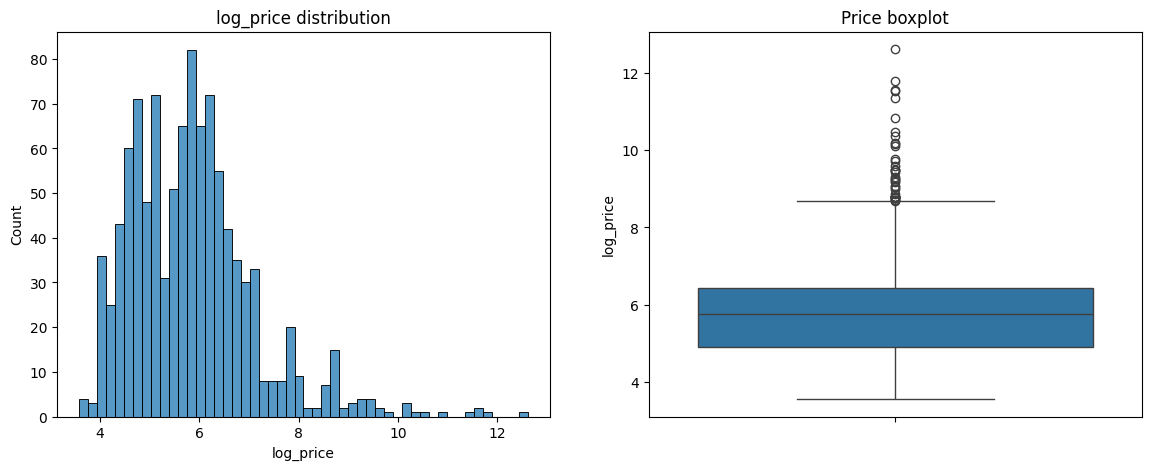

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(np.log1p(data_full['price']), bins=50, ax=axes[0])
axes[0].set_title('log_price distribution')
axes[0].set_xlabel('log_price')

sns.boxplot(y=data_full['log_price'], ax=axes[1])
axes[1].set_title('Price boxplot')
plt.show()


Как видим, log(цены) распределен относительно близко к нормальному с далеким правым хвостом, будем использовать его

Уберем выбросы

In [12]:
Q1, Q3 = data_full['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

outliers = data_full[data_full['price'] > upper]
print(f'Выбросы по цене > {upper:,.0f} $: {len(outliers)} из {len(data_full)} '
      f'({len(outliers)/len(data_full):.1%})')

# DataFrame без выбросов (пригодится для графиков/моделей):
data_wo = data_full[data_full['price'] <= upper].copy()

Выбросы по цене > 1,330 $: 110 из 1029 (10.7%)


С выбросами

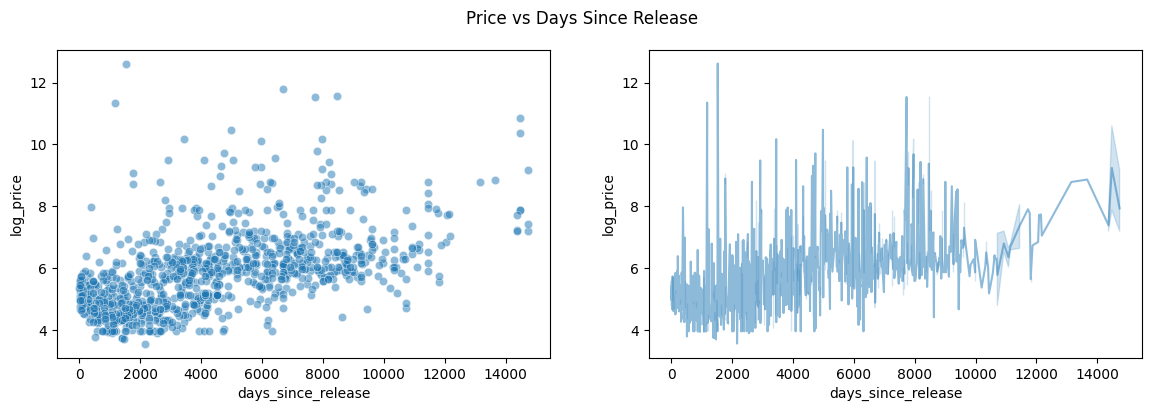

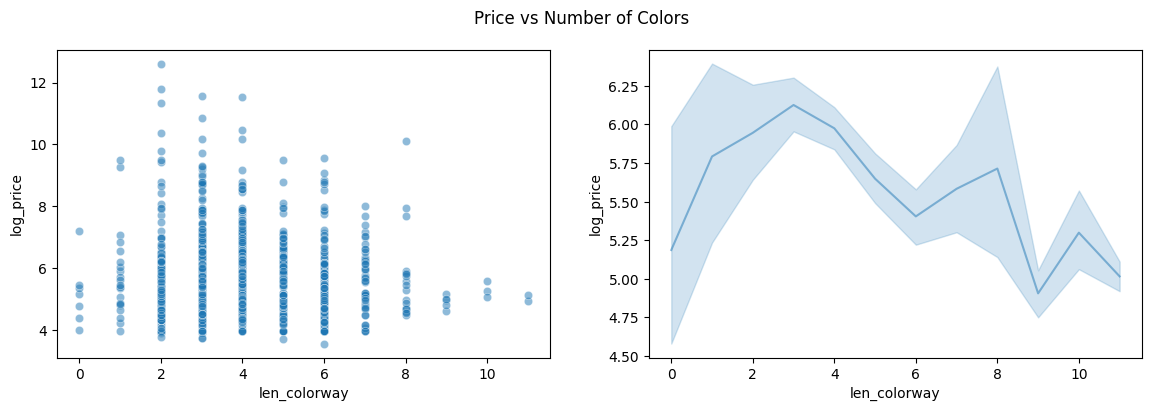

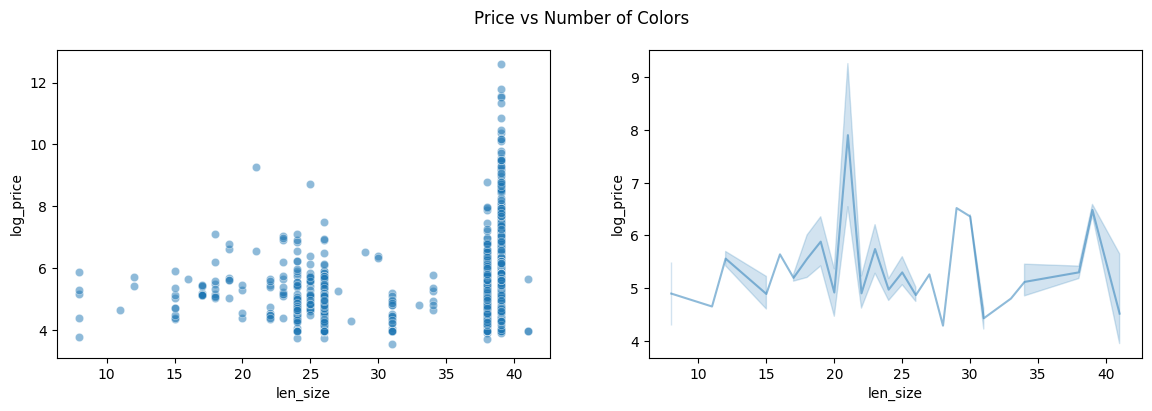

In [13]:
fig1, axes1 =  plt.subplots(1, 2, figsize=(14, 4))
fig1.suptitle('Price vs Days Since Release')
sns.scatterplot(data=data_full, x='days_since_release', y='log_price', alpha=.5, ax=axes1[0])
sns.lineplot(data=data_full, x='days_since_release', y='log_price', alpha=.5, ax=axes1[1])
plt.show()

fig1, axes1 =  plt.subplots(1, 2, figsize=(14, 4))
fig1.suptitle('Price vs Number of Colors')
sns.scatterplot(data=data_full, x='len_colorway', y='log_price', alpha=.5, ax=axes1[0])
sns.lineplot(data=data_full, x='len_colorway', y='log_price', alpha=.5, ax=axes1[1])
plt.show()

fig1, axes1 =  plt.subplots(1, 2, figsize=(14, 4))
fig1.suptitle('Price vs Number of Colors')
sns.scatterplot(data=data_full, x='len_size', y='log_price', alpha=.5, ax=axes1[0])
sns.lineplot(data=data_full, x='len_size', y='log_price', alpha=.5, ax=axes1[1])
plt.show()

Без выбросов

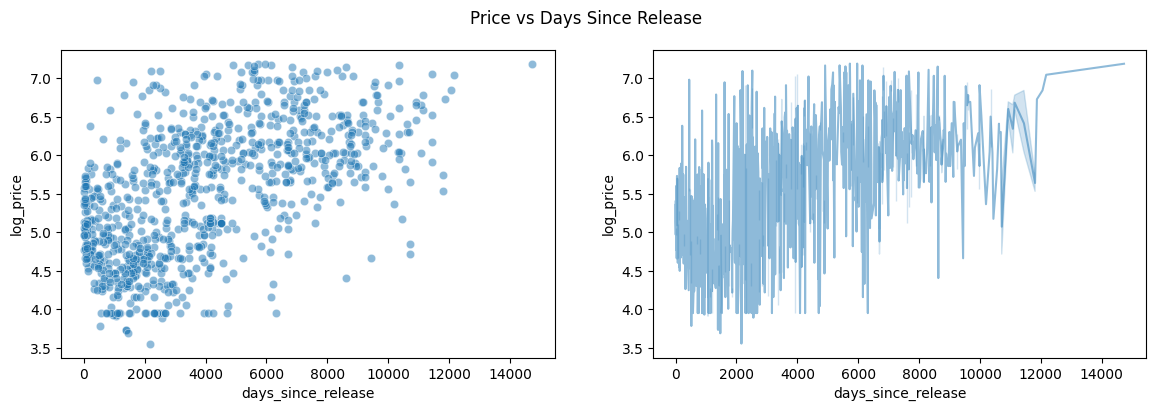

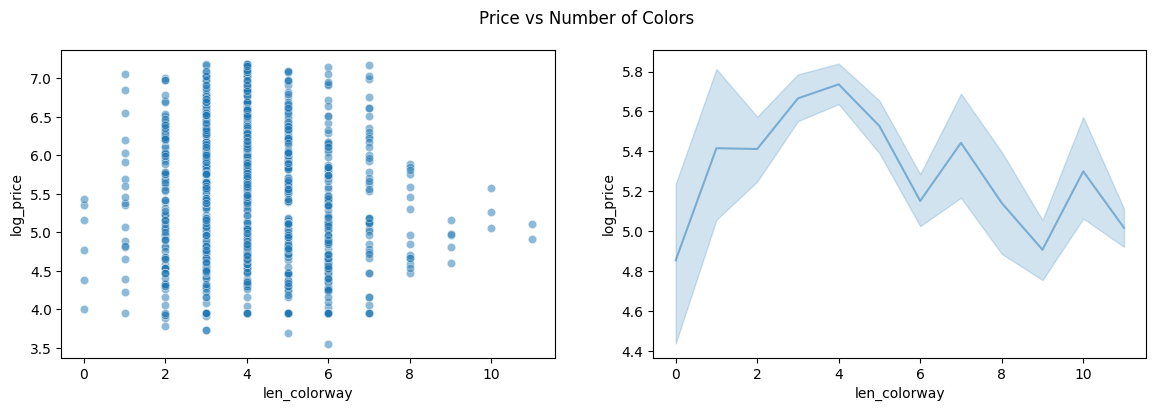

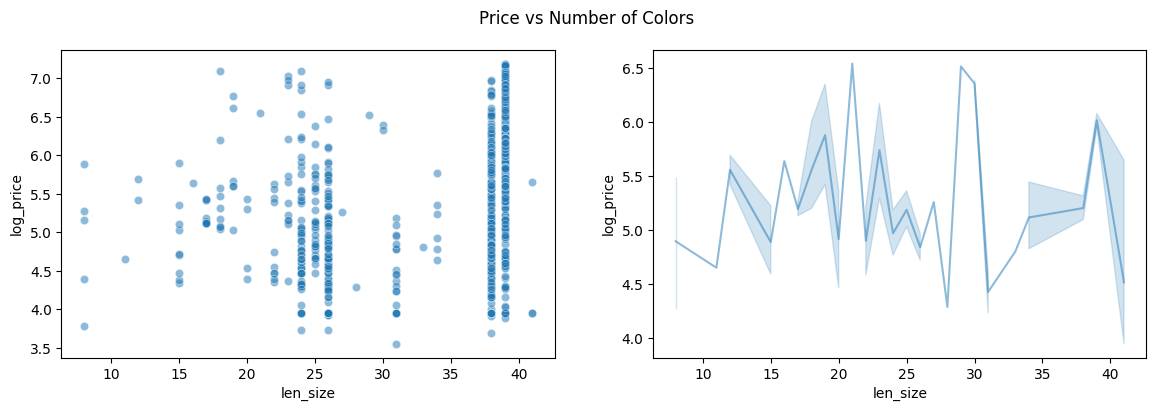

In [14]:
fig1, axes1 =  plt.subplots(1, 2, figsize=(14, 4))
fig1.suptitle('Price vs Days Since Release')
sns.scatterplot(data=data_wo, x='days_since_release', y='log_price', alpha=.5, ax=axes1[0])
sns.lineplot(data=data_wo, x='days_since_release', y='log_price', alpha=.5, ax=axes1[1])
plt.show()

fig1, axes1 =  plt.subplots(1, 2, figsize=(14, 4))
fig1.suptitle('Price vs Number of Colors')
sns.scatterplot(data=data_wo, x='len_colorway', y='log_price', alpha=.5, ax=axes1[0])
sns.lineplot(data=data_wo, x='len_colorway', y='log_price', alpha=.5, ax=axes1[1])
plt.show()

fig1, axes1 =  plt.subplots(1, 2, figsize=(14, 4))
fig1.suptitle('Price vs Number of Colors')
sns.scatterplot(data=data_wo, x='len_size', y='log_price', alpha=.5, ax=axes1[0])
sns.lineplot(data=data_wo, x='len_size', y='log_price', alpha=.5, ax=axes1[1])
plt.show()

Видна относительно неплохая линейная зависимость логарифма цены от days since release

Пока что не будем трогать выбросы по межквантильному размаху и посмотрим на них позже

Построим корреляционную матрицу для цены и логарифма цены

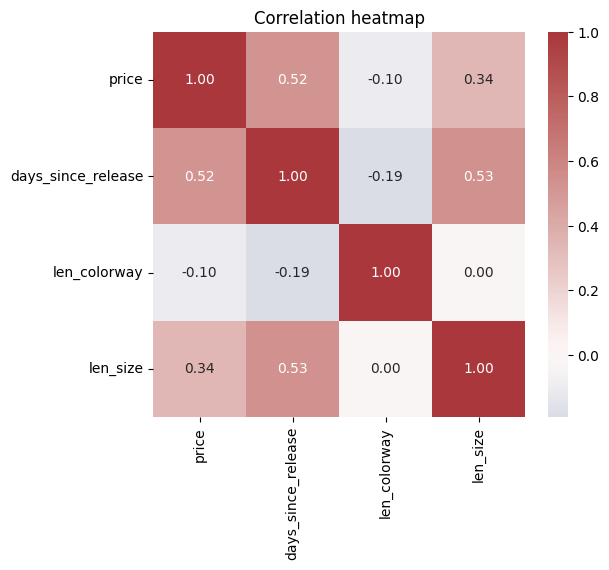

In [15]:
numeric_cols = ['price', 'days_since_release', 'len_colorway', 'len_size']
corr = data_wo[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation heatmap')
plt.show()


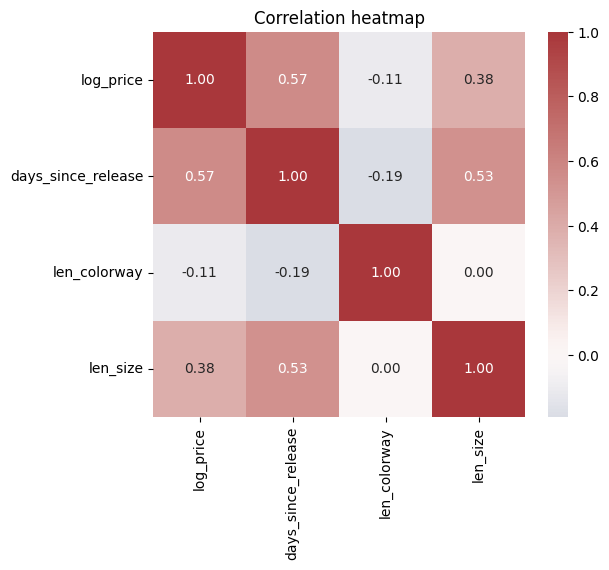

In [16]:
numeric_cols = ['log_price', 'days_since_release', 'len_colorway', 'len_size']
corr = data_wo[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation heatmap')
plt.show()

Заметна достаточно сильная положительная корреляция между количеством дней с первого релиза и ценой, что логично, так как чем старше кроссовки, тем более они раритетные и тем больше они стоят

Также уловлена положительная корреляция с размахом возможных размеров (len_size), что может быть связано с тем, что при бОльшем количестве доступных размеров спрос тоже будет больше, поэтому и цена будет скорее выше, чем ниже

С размером цветовой палитры корреляция с ценой отрицательная, не совсем очевидно почему

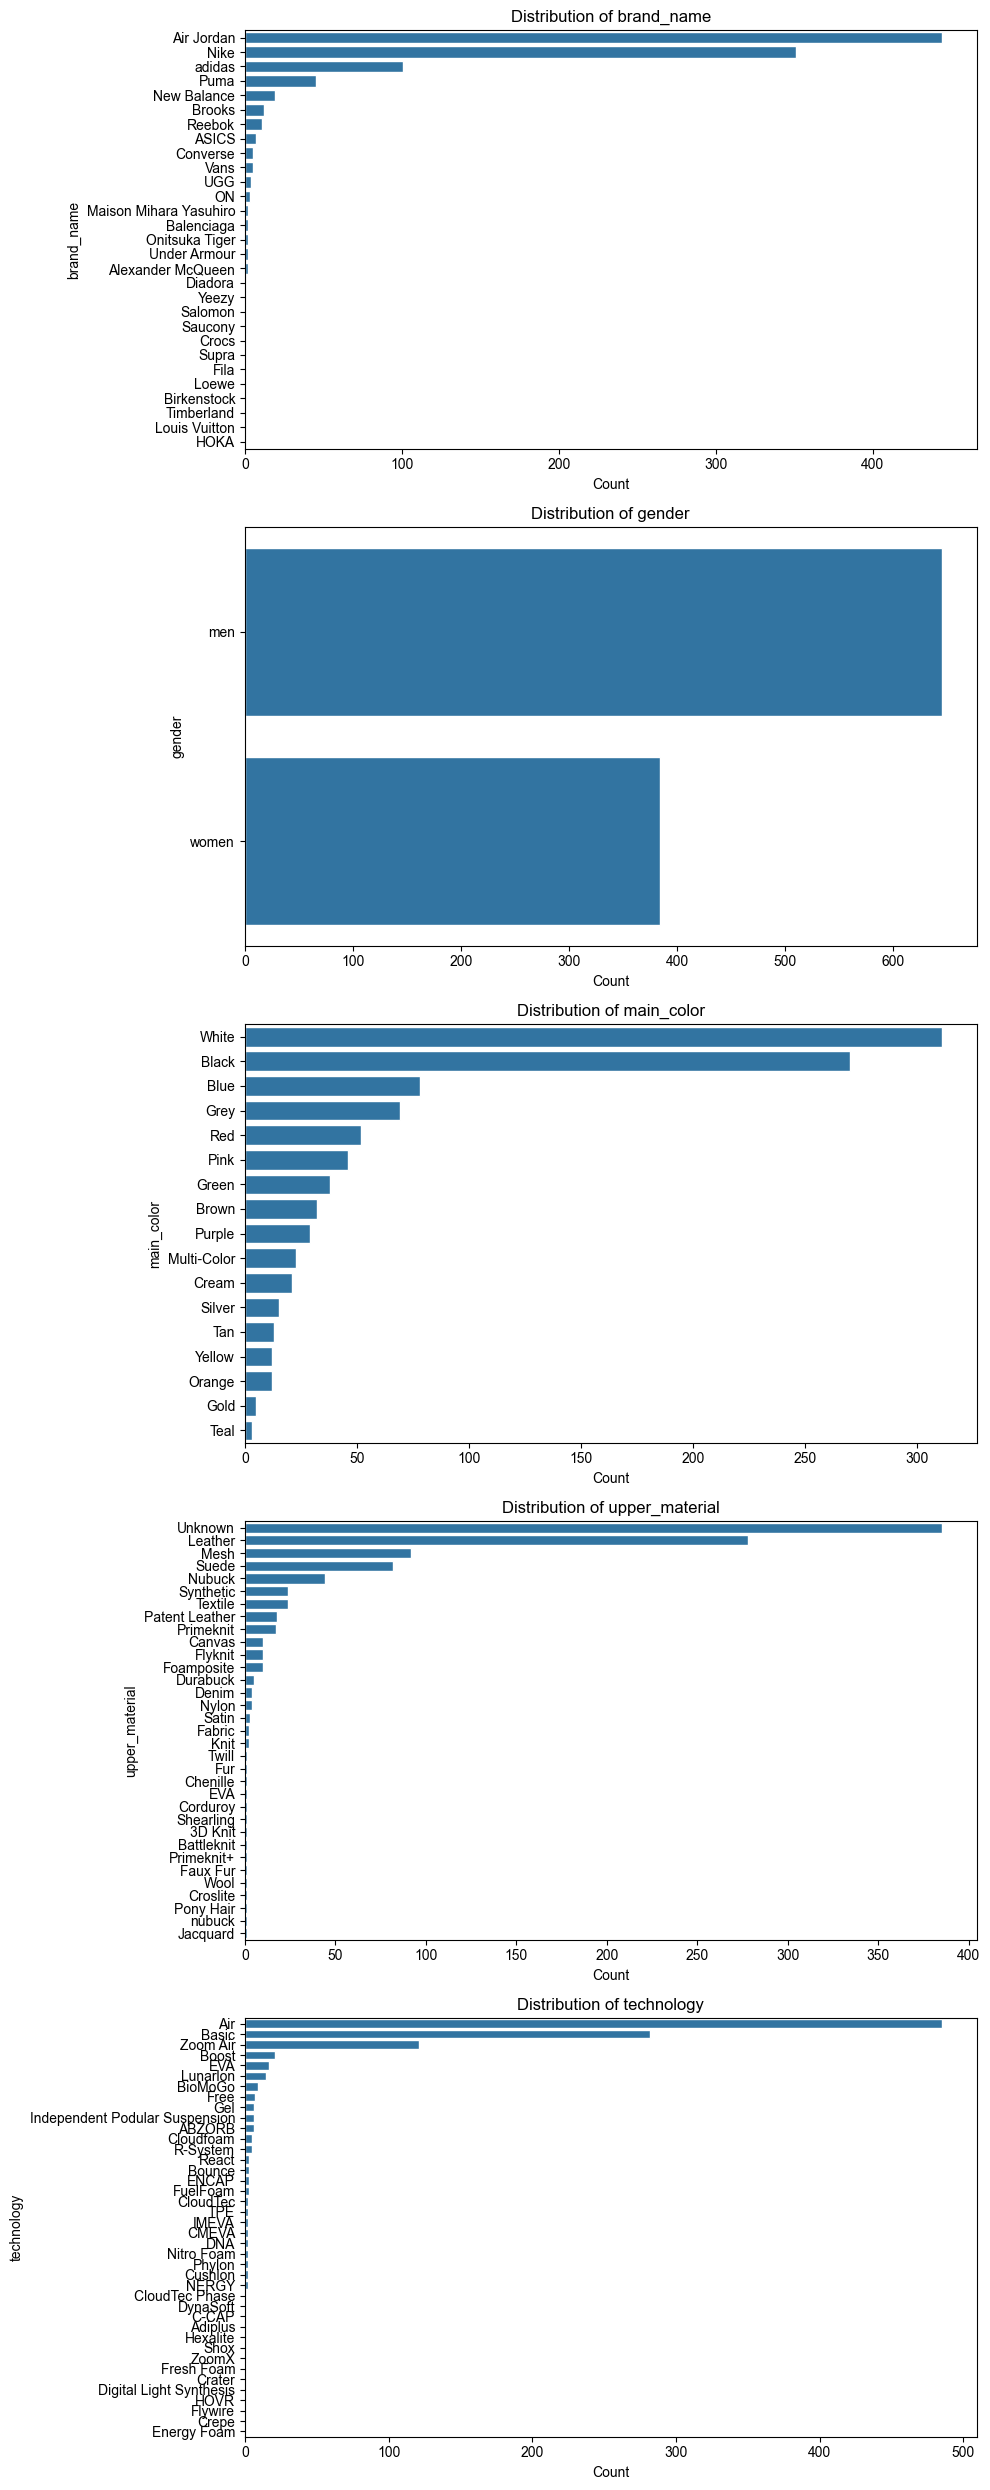

In [17]:
categorical_cols = ['brand_name', 'gender', 'main_color', 'upper_material', 'technology']

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 25))
sns.set_style("whitegrid")

for ax, col in zip(axes, categorical_cols):
    sns.countplot(data=data_full, y=col, order=data_full[col].value_counts().index, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Count')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

Создадим новые категориальные признаки на основе имеющихся и проверим могут ли они нам подойти для факторов

In [18]:
df_new_categorical = data_full.copy()
most_popular = ['Air Jordan', 'Nike', 'adidas', 'Puma', 'New Balance']
for brand in most_popular:
    df_new_categorical[brand] = np.where(df_new_categorical['brand_name'] == brand, 1, 0) #выберем 5 самых популярных брендов как отдельные категориальные
df_new_categorical.drop('brand_name', axis=1, inplace=True)
#далее собираем признак яркий цвет 
df_new_categorical['bright_color'] = np.where(df_new_categorical['main_color'].isin(['Red', 'Blue', 'Orange', 'Yellow', 'Purple', 'Multi-Color', 'Green', 'Gold', 'Pink', 'Teal']), 1, 0)
#далее собираем признак женский пол
df_new_categorical['female'] = np.where(df_new_categorical['gender'] == 'women', 1, 0)

#создаем признак редкий материал, если материал встречается менее 20 раз в датасете
rare_material = df_new_categorical.groupby(['upper_material']).agg({'price' : 'count'}).reset_index()
rare_material = rare_material[rare_material['price'] < 20]['upper_material'].to_numpy()


df_new_categorical['rare_material'] = np.where(df_new_categorical['upper_material'].isin(rare_material), 1, 0)

#создаем признак редкая технология, если технология встречается менее 20 раз в датасете

rare_technology = df_new_categorical.groupby(['technology']).agg({'price' : 'count'}).reset_index()
rare_technology = rare_technology[rare_technology['price'] < 20]['technology'].to_numpy()

df_new_categorical['rare_technology'] = np.where(df_new_categorical['technology'].isin(rare_technology), 1, 0)

#прризнак черный или белый основной цвет 

df_new_categorical['b_n_w'] = np.where(df_new_categorical['main_color'].isin(['Black', 'White']), 1, 0)

#признак является ли кроссовок технологией Air или Zoom Air (так как они самые популярные)
df_new_categorical['is_air_technology'] = np.where(df_new_categorical['technology'].isin(['Air', 'Zoom Air']), 1, 0)
df_new_categorical

,release_date,model,gender,len_colorway,main_color,upper_material,technology,len_size,unique,price,...,Nike,adidas,Puma,New Balance,bright_color,female,rare_material,rare_technology,b_n_w,is_air_technology
0,1985-09-14,Air Jordan 1 High 'Chicago' 1985,men,3,Red,Leather,Air,39,0,50990.0,...,0,0,0,0,1,0,0,0,0,1
1,1985-09-14,Air Jordan 1 High 'Bred' 1985,men,2,Black,Leather,Air,39,0,31398.0,...,0,0,0,0,0,0,0,0,1,1
2,1985-09-14,Air Jordan 1 High 'Royal' 1985,men,3,Black,Leather,Air,39,0,2642.0,...,0,0,0,0,0,0,0,0,1,1
3,1985-09-14,Air Jordan 1 High 'Natural Grey' 1985,men,3,White,Leather,Air,39,0,2632.0,...,0,0,0,0,0,0,0,0,1,1
4,1985-01-01,Air Jordan 1 High OG 'Black Toe' 1985,men,4,Black,Leather,Air,39,0,9705.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,2025-04-01,Wmns Taekwondo 'Clear Pink Satin',women,5,Pink,Satin,Basic,26,0,140.0,...,0,1,0,0,1,1,1,0,0,0
1025,2025-03-01,Wmns Speedcat Ballet 'Metallic - Silver',women,2,Silver,Leather,Basic,24,0,105.0,...,0,0,1,0,0,1,0,0,0,0
1026,2025-02-02,Wmns Gazelle Bold 'Clear Mint Lucid Blue Satin',women,6,Green,Satin,Basic,26,0,144.0,...,0,1,0,0,1,1,1,0,0,0
1027,2025-03-20,Wmns Mexico 66 TGRS 'Crystal Pink',women,4,Pink,Leather,Basic,23,0,309.0,...,0,0,0,0,1,1,0,0,0,0


Построим ящики с усами по log_price и проверим есть ли какие-нибудь адекватные признаки 

Text(0, 0.5, 'log_price')

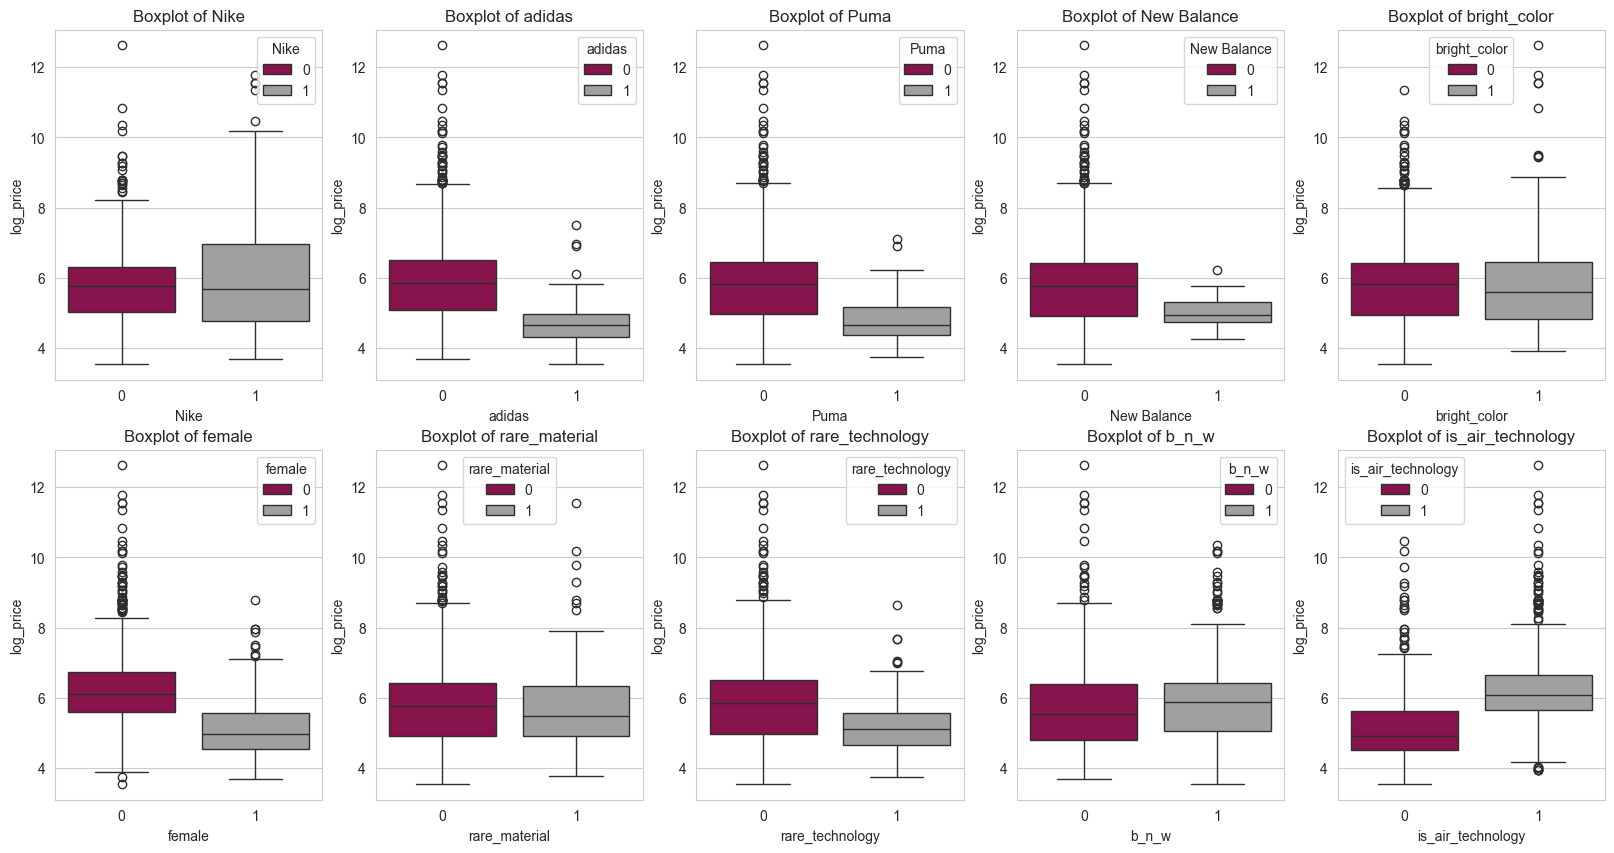

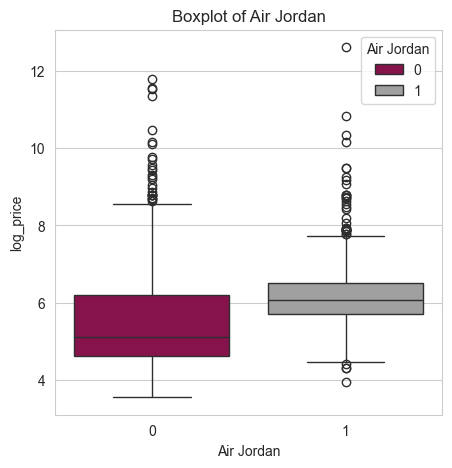

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig2, ax = plt.subplots(1, 1, figsize=(5, 5))
axes = axes.flatten()
palette = {0: "#99004C", 1: "#A0A0A0"}
categorical_cols = ['Nike', 'adidas', 'Puma', 'New Balance', 'bright_color', 'female', 'rare_material', 'rare_technology', 'b_n_w', 'is_air_technology']
for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df_new_categorical, x=col, y='log_price', hue=col, palette=palette, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('log_price')
sns.boxplot(df_new_categorical,
            x='Air Jordan',
            y='log_price',
            hue='Air Jordan',
            palette=palette,
            ax=ax)
ax.set_title(f'Boxplot of Air Jordan')
ax.set_xlabel('Air Jordan')
ax.set_ylabel('log_price')
        

Заметим, что из самых популярных брендов Air Jordan в среднем выше остальных по цене, средняя цена Nike сопоставима со средней ценой остальных брендов, adidas, Puma и New Balance же в среднем ниже, чем оставшиеся бренды, что логично из предположения, что в оставшился среднюю цену вверх тянут как раз Nike и Air Jordan. 

Bright Color показывает чуть ниже среднюю цену, чем остальные, почему можно легко понять по графику b_n_w, кроссовки с классическим (черный / белый) основным цветом в среднем стоят выше, чем неклассические, что тоже соответствует здравому смыслу, так как это самые базовые цвета, которые используются почти во всех моделях и которые с бОльшей вероятностью будут основным цветом для дорогой модели.

Female: женские кроссовки в среднем стоят ниже мужских

Для rare material и rare technology средние цены чуть ниже относительно остальных 

Кроссовки с технологией air в среднем стоят заметно выше, чем другие 

**Модели**

В качестве регрессоров попробуем взять следующие факторы: 

const, days_since_release, len_size, len_colorway, unique, bright_color, female, Nike, adidas, Puma, New Balance, Air Jordan (5 самых популярных брендов), rare_material, rare_technology

In [41]:
df_new_categorical['const'] = 1

In [42]:
features_1 = ['const', 'len_colorway', 'len_size', 'unique', 'days_since_release', 'Air Jordan', 'Nike', 'Puma', 'New Balance', 'adidas', 'bright_color', 'female', 'rare_material', 'rare_technology']
target = 'log_price'

In [85]:
from statsmodels.regression.linear_model import OLS

model = OLS(df_new_categorical[target], df_new_categorical[features_1])
res = model.fit(cov_type='HC0')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     55.82
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.00e-109
Time:                        10:25:27   Log-Likelihood:                -1449.7
No. Observations:                1029   AIC:                             2927.
Df Residuals:                    1015   BIC:                             2997.
Df Model:                          13                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.4636      0.217     25.182      0.000       5.038       5.889
len_colorway          -0.0162      0.023     -0.709      0.478      -0.061       0.029
len_size              -0.0073      0.007     -1.050      0.294      -0.021       0.006
unique                 0.5627      0.157      3.594      0.000       0.256       0.869
days_since_release     0.0002   1.44e-05     10.977      0.000       0.000       0.000
Air Jordan             0.1631      0.174      0.936      0.349      -0.178       0.505
Nike                   0.3648      0.179      2.043      0.041       0.015       0.715
Puma                  -0.1337      0.159     -0.842      0.400      -0.445       0.178
New Balance            0.0155      0.160      0.097      0.923      -0.298       0.329
adidas                -0.2796      0.154     -1.821      0.069      -0.580       0.021
bright_color           0.1440      0.078      1.858      0.063      -0.008       0.296
female                -0.6741      0.082     -8.243      0.000      -0.834      -0.514
rare_material          0.2024      0.115      1.763      0.078      -0.023       0.427
rare_technology       -0.0891      0.090     -0.990      0.322      -0.265       0.087
==============================================================================
Omnibus:                      347.274   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1672.285
Skew:                           1.495   Prob(JB):                         0.00
Kurtosis:                       8.483   Cond. No.                     6.00e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large,  6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Попробуем другую спецификацию, теперь вместо редкой технологии возьмем is_air_technology, а также b_n_w (индикатор того, что основной цвет черный или белый) вместо bright_color

In [45]:
features_2 = ['const', 'len_colorway', 'len_size', 'unique', 'days_since_release', 'Air Jordan', 'Nike', 'Puma', 'New Balance', 'adidas', 'b_n_w', 'female', 'is_air_technology']
model2 = OLS(df_new_categorical[target], df_new_categorical[features_2])
res2 = model2.fit(cov_type='HC0')
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     61.01
Date:                Thu, 08 May 2025   Prob (F-statistic):          7.15e-111
Time:                        09:51:20   Log-Likelihood:                -1443.7
No. Observations:                1029   AIC:                             2913.
Df Residuals:                    1016   BIC:                             2978.
Df Model:                          12                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.5958      0.200     28.011      0.000       5.204       5.987
len_colorway          -0.0283      0.023     -1.224      0.221      -0.074       0.017
len_size              -0.0064      0.007     -0.940      0.347      -0.020       0.007
unique                 0.5217      0.155      3.358      0.001       0.217       0.826
days_since_release     0.0002   1.43e-05     10.669      0.000       0.000       0.000
Air Jordan            -0.0873      0.192     -0.456      0.649      -0.463       0.288
Nike                   0.2294      0.175      1.312      0.189      -0.113       0.572
Puma                  -0.1673      0.157     -1.064      0.287      -0.475       0.141
New Balance           -0.1060      0.162     -0.656      0.512      -0.423       0.211
adidas                -0.2355      0.144     -1.635      0.102      -0.518       0.047
b_n_w                 -0.2004      0.072     -2.793      0.005      -0.341      -0.060
female                -0.6175      0.081     -7.653      0.000      -0.776      -0.459
is_air_technology      0.3529      0.122      2.898      0.004       0.114       0.591
==============================================================================
Omnibus:                      336.396   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1568.033
Skew:                           1.454   Prob(JB):                         0.00
Kurtosis:                       8.302   Cond. No.                     6.07e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 6.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как видим вторая модель лучше предыдущей с точки зрения $R^2_{adj}$

Признаки b_n_w и is_air_technology получились значимыми 

Попробуем еще одну спецификацию: заметим, что линеаризованный график зависимости цены от len_colorway отдаленно напоминает параболу, поэтому попробуем добавим признак $\text{len\_colorway}^2$

In [46]:
df_new_categorical['len_colorway2'] = df_new_categorical['len_colorway']**2

In [47]:
features_3 = ['const', 'len_colorway', 'len_colorway2', 'len_size', 'unique', 'days_since_release', 'Air Jordan', 'Nike', 'Puma', 'New Balance', 'adidas', 'b_n_w', 'female', 'is_air_technology']
model3 = OLS(df_new_categorical[target], df_new_categorical[features_3])
res3 = model3.fit(cov_type='HC0')
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     56.50
Date:                Thu, 08 May 2025   Prob (F-statistic):          2.35e-110
Time:                        09:51:26   Log-Likelihood:                -1443.4
No. Observations:                1029   AIC:                             2915.
Df Residuals:                    1015   BIC:                             2984.
Df Model:                          13                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.6871      0.242     23.500      0.000       5.213       6.161
len_colorway          -0.0818      0.073     -1.120      0.263      -0.225       0.061
len_colorway2          0.0059      0.007      0.844      0.399      -0.008       0.019
len_size              -0.0063      0.007     -0.934      0.350      -0.020       0.007
unique                 0.5221      0.156      3.357      0.001       0.217       0.827
days_since_release     0.0002   1.43e-05     10.774      0.000       0.000       0.000
Air Jordan            -0.0777      0.191     -0.407      0.684      -0.452       0.296
Nike                   0.2337      0.174      1.342      0.179      -0.107       0.575
Puma                  -0.1650      0.157     -1.054      0.292      -0.472       0.142
New Balance           -0.1029      0.160     -0.644      0.520      -0.416       0.210
adidas                -0.2242      0.144     -1.553      0.121      -0.507       0.059
b_n_w                 -0.1985      0.071     -2.781      0.005      -0.338      -0.059
female                -0.6160      0.081     -7.631      0.000      -0.774      -0.458
is_air_technology      0.3535      0.122      2.900      0.004       0.115       0.592
==============================================================================
Omnibus:                      334.333   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1544.038
Skew:                           1.448   Prob(JB):                         0.00
Kurtosis:                       8.256   Cond. No.                     6.07e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 6.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Заметим, что $R^2_{adj}$ не улучшился, а len_colorway и $\text{len\_colorway}^2$ оказались незначимыми, поэтому интуиции не будет...

По итогам трех возможных спецификаций для таргета log_price, наибольший $R^2_{adj}$ и наименьшие информационные критерии AIC и BIC имеет вторая модель, поэтому выбираем ее 

Все три модели также оказались значимыми, F-статистика высокая, значит наша модель лучше константы ням 

Также исключим незначимые факторы на 5-%-м уровне значимости и будем работать с короткой и интерпретируемой моделью

Оставшиеся факторы: const, unique, days_since_release, b_n_w, female, is_air_technology

In [89]:
features = ['const', 'unique', 'days_since_release', 'b_n_w', 'female', 'is_air_technology']
model = OLS(df_new_categorical[target], df_new_categorical[features])
res = model.fit(cov_type='HC0')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.69e-105
Time:                        12:01:52   Log-Likelihood:                -1457.0
No. Observations:                1029   AIC:                             2926.
Df Residuals:                    1023   BIC:                             2956.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2726      0.095     55.449      0.000       5.086       5.459
unique                 0.5327      0.159      3.344      0.001       0.220       0.845
days_since_release     0.0002   1.15e-05     13.970      0.000       0.000       0.000
b_n_w                 -0.2435      0.069     -3.544      0.000      -0.378      -0.109
female                -0.5812      0.076     -7.612      0.000      -0.731      -0.432
is_air_technology      0.3046      0.084      3.638      0.000       0.140       0.469
==============================================================================
Omnibus:                      363.455   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1721.075
Skew:                           1.581   Prob(JB):                         0.00
Kurtosis:                       8.491   Cond. No.                     2.18e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Проверим предпосылки теоремы Гаусса-Маркова:

**1) гомоскедастиноcть, то есть $\sigma_i^2 = \sigma^2$**


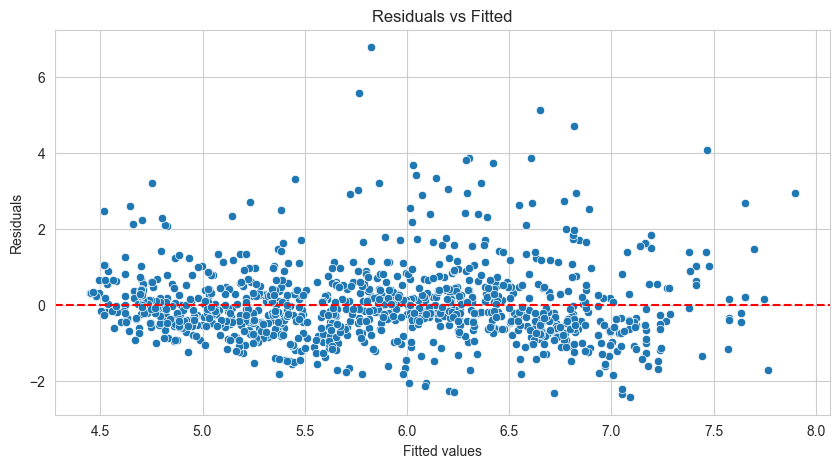

In [50]:
#посмотрим на график остатки-прогнозы 
y_hatb = res.predict(df_new_categorical[features])
residuals = df_new_categorical[target] - y_hatb
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=y_hatb, y=residuals, ax=ax)
ax.axhline(0, color='red', linestyle='--')
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.show()

Можем предположить наличие гетероскедастичности, так как разброс увеличивается с ростом прогноза.

Остатки случайным образом распределены вокруг нуля, средний уровень примерно равен нулю, что говорит об отсутствии систематической ошибки.

Также видим слишком большие остатки, что говорит о выбросах в нашей модели

Попробуем обнаружить гетероскедастичность с помощью тестов Уайта и Бройша-Пагана:

In [51]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals = res.resid
breuschpagan_test = het_breuschpagan(residuals, df_new_categorical[features])
hi2 = breuschpagan_test[0]
p_val = breuschpagan_test[1]
print(f'Breusch-Pagan test statistic: {hi2:.4f}')
print(f'Breusch-Pagan p-value: {p_val:.4f}')

Breusch-Pagan test statistic: 30.2598
Breusch-Pagan p-value: 0.0000


In [52]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(residuals, df_new_categorical[features])
hi2 = white_test[0]
p_val = white_test[1]
print(f'White test statistic: {hi2:.4f}')
print(f'White test p-value: {p_val:.4f}')

White test statistic: 41.3339
White test p-value: 0.0005


Таким образом обнаружена гетероскедастичность по обоим тестам на 5-%-м уровне значимости 

Предпосылка о гомоскедастичности не выполнена, то есть дисперсии ошибок отличаются, что ведет к тому, что оценки стандартных ошибок коэффициентов регрессии смещены, оценки метода наименьших квадратов неэффективны, t-статистики коэффициентов неадекватны, следовательно мы неправильно делаем вывод о значимости коэффициентов

Для решения этой проблемы мы заранее при обучении модели использовали робастные стандартные ошибки в форме Уайта HC0. Эта поправка влияет только на способ расчёта матрицы ковариаций оценок коэффициентов (и, следовательно, их стандартных ошибок, t-статистик и p-value), но не на сами коэффициенты и не на остатки. Поэтому выводы о значимости коэффициентов были сделаны без возможных заблуждений из-за гетероскедастичности 

**2) Мультиколллинеарность (X - полного ранга) в нашем случае (высокое n) не сыграет сильной роли, но на всякий случай выведем VIF для факторов и проверим, нет ли значений выше 10 не считая const** 

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = df_new_categorical[features].columns
vif_data['VIF'] = [
    variance_inflation_factor(df_new_categorical[features].values, i) 
    for i in range(df_new_categorical[features].shape[1])
]
vif_data

,Feature,VIF
0,const,8.314848
1,unique,1.010572
2,days_since_release,1.279401
3,b_n_w,1.056139
4,female,1.532052
5,is_air_technology,1.580504


VIF > 10 отсутствуют, что позволяет сделать вывод о том, что мультиколлинеарность не является нашей проблемой

Посмотрим на корреляционную матрицу еще на всякий случай:

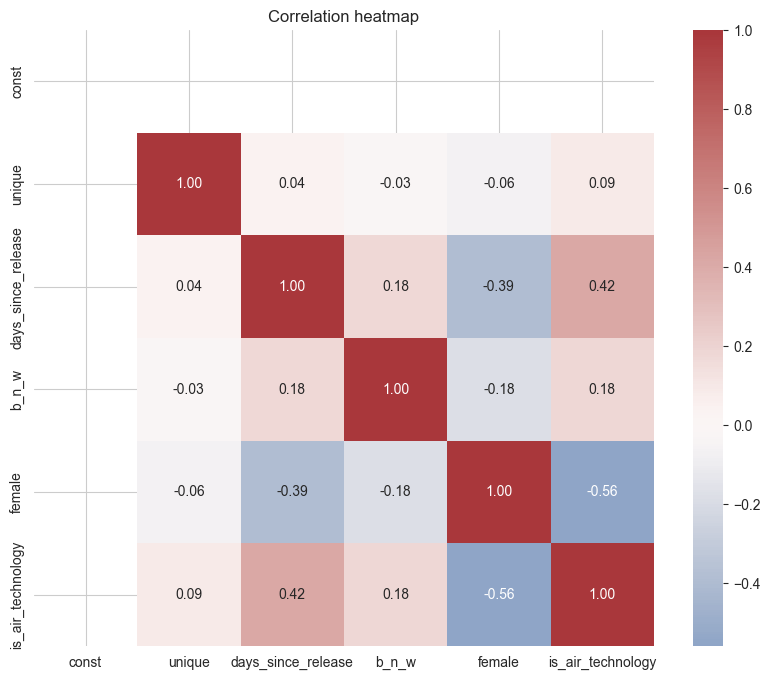

In [54]:
corr = df_new_categorical[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation heatmap')
plt.show()


В корреляционной матрице признаков признаков мультиколлинеарности тоже не выявлено 

**3) Правильная спецификация**

Используем тест Рамсея с одним вспомогательным регрессором

In [55]:
from statsmodels.stats.diagnostic import linear_reset
reset = linear_reset(res=res, power=2, test_type="fitted", use_f=True)
p_value = reset.pvalue
f = reset.fvalue
print(f'p-value({p_value:.3f})')
print(f'f-value({f:.3f})')
print(reset)

p-value(0.694)
f-value(0.155)
<F test: F=0.15530538527737045, p=0.6935982507416059, df_denom=1.02e+03, df_num=1>


Результаты теста Рамсея не показали наличие ошибки спецификации

Давайте полулогарифмическую модель (нашу) с линейной и проверим не получили ли мы ошибку спецификации такого плана 

In [86]:
model_linear = OLS(df_new_categorical['price'], df_new_categorical[features])
res_linear = model_linear.fit(cov_type='HC0')
res_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     8.702
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.31e-08
Time:                        12:01:21   Log-Likelihood:                -11099.
No. Observations:                1029   AIC:                         2.221e+04
Df Residuals:                    1023   BIC:                         2.224e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2444.1963   1242.972      1.966      0.049       8.016    4880.377
unique              1733.5640   1590.165      1.090      0.276   -1383.102    4850.230
days_since_release     0.1264      0.166      0.761      0.447      -0.199       0.452
b_n_w              -2241.5088    961.830     -2.330      0.020   -4126.660    -356.357
female             -1791.3646    646.066     -2.773      0.006   -3057.630    -525.099
is_air_technology    780.0486    817.978      0.954      0.340    -823.159    2383.256
==============================================================================
Omnibus:                     2266.287   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7905823.553
Skew:                          18.772   Prob(JB):                         0.00
Kurtosis:                     430.765   Cond. No.                     2.18e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Все равно сделаем Бокса-Кокса и убедимся:


In [87]:
from scipy.stats.mstats import gmean

y_mean_g = gmean(df_new_categorical['price'])
y_norm = df_new_categorical['price'] / y_mean_g
y_norm

#оценим две вспомогательные регрессии 

model_help_1 = OLS(y_norm, df_new_categorical[features]).fit(cov_type='HC0')
model_help_2 = OLS(np.log(y_norm), df_new_categorical[features]).fit(cov_type='HC0')
rss1 = model_help_1.ssr
rss2 = model_help_2.ssr
hi2 = df_new_categorical.shape[0] / 2 * np.abs(np.log(rss1 / rss2))
print(f'hi2 statistics: {hi2}')
print(f'linear rss: {rss1}')
print(f'log_rss: {rss2}')

hi2 statistics: 3631.7310019297784
linear rss: 1189559.6275362764
log_rss: 1022.8373032639109


ОЧЕВИДНО выбираем полулогарифмическую модель, какую мы и сделали изначально, ее RSS в разы ниже линейной 

Теперь более четко проверим нормальность остатков, используем тест Харке-Бера 

Jarque-Bera test statistic: 1721.0749
Jarque-Bera p-value: 0.0000


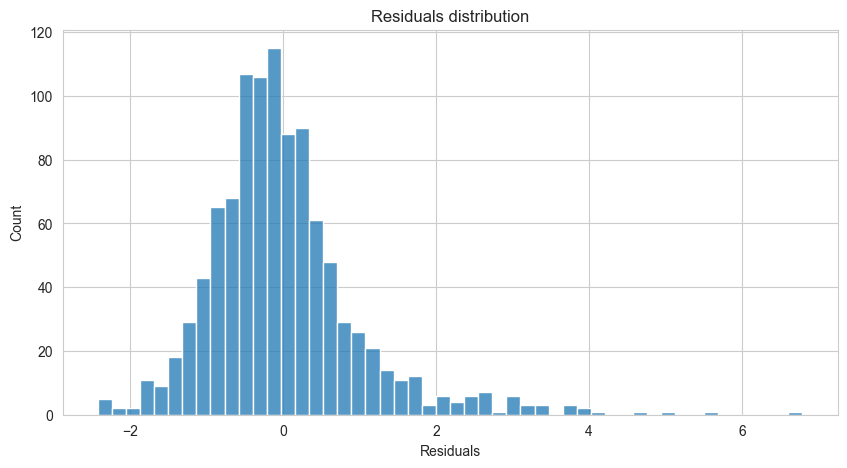

In [90]:
#тест Харке-Бера на нормальность остатков
from statsmodels.stats.stattools import jarque_bera
jb_test = jarque_bera(res.resid)
jb_stat = jb_test[0]
jb_p_value = jb_test[1]
print(f'Jarque-Bera test statistic: {jb_stat:.4f}')
print(f'Jarque-Bera p-value: {jb_p_value:.4f}')
#нарисуем распределение остатков
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(res.resid, bins=50, ax=ax)
ax.set_title('Residuals distribution')
ax.set_xlabel('Residuals')
ax.set_ylabel('Count')
plt.show()

Тест отверг гипотезу о нормальности остатков, возможно это связано с выбросами в нашей модели, поэтому проведем проверку на выбросы, исключим их и переоценим модель

In [61]:
influence = res.get_influence()
standardized_residuals = influence.resid_studentized_internal
dffits = influence.dffits[0] 

n = len(df_new_categorical)    
p = len(features) 

critical_value = 2 * np.sqrt(p / n)

X = df_new_categorical[features]
y  = df_new_categorical[target]
X['standardized_residuals'] = standardized_residuals
X['dffits'] = dffits
outliers = X[(abs(standardized_residuals) > 2) | (abs(dffits) > critical_value)] #используем два критерия выбросов 
pd.concat([np.log(y[outliers.index]), outliers], axis=1)
#исключили выбросы
df_new_categorical_wo = df_new_categorical.drop(outliers.index)
df_new_categorical_wo.reset_index(drop=True, inplace=True)
df_new_categorical_wo[features]

/var/folders/l7/tg710gkj58n_wh8gk9hnc79c0000gq/T/ipykernel_8205/4146339996.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['standardized_residuals'] = standardized_residuals
/var/folders/l7/tg710gkj58n_wh8gk9hnc79c0000gq/T/ipykernel_8205/4146339996.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dffits'] = dffits


,const,unique,days_since_release,b_n_w,female,is_air_technology
0,1,0,14476,1,0,1
1,1,0,14476,1,0,1
2,1,0,14732,0,0,0
3,1,0,14732,0,0,0
4,1,0,14367,0,0,0
...,...,...,...,...,...,...
943,1,0,34,0,1,0
944,1,0,65,0,1,0
945,1,0,92,0,1,0
946,1,0,46,0,1,0


In [62]:
#теперь строим модель без выбросов
model_wo = OLS(df_new_categorical_wo[target], df_new_categorical_wo[features])
res_wo = model_wo.fit(cov_type='HC0')
res_wo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     221.5
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.15e-156
Time:                        09:52:18   Log-Likelihood:                -969.26
No. Observations:                 948   AIC:                             1951.
Df Residuals:                     942   BIC:                             1980.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0358      0.068     73.979      0.000       4.902       5.169
unique                 0.4368      0.094      4.652      0.000       0.253       0.621
days_since_release     0.0002   7.53e-06     20.178      0.000       0.000       0.000
b_n_w                 -0.1960      0.047     -4.194      0.000      -0.288      -0.104
female                -0.4194      0.058     -7.257      0.000      -0.533      -0.306
is_air_technology      0.4204      0.059      7.094      0.000       0.304       0.537
==============================================================================
Omnibus:                       25.236   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.575
Skew:                           0.393   Prob(JB):                     1.70e-06
Kurtosis:                       3.232   Cond. No.                     2.49e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Получили отличные $R^2$ и $R^2_{adj}$

Теперь проверим на остатки еще раз 

Jarque-Bera test statistic: 26.5752
Jarque-Bera p-value: 0.0000


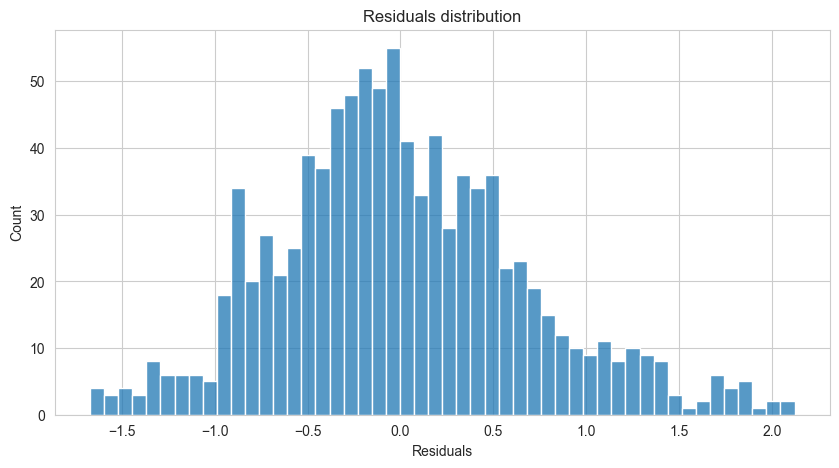

In [63]:
#тест Харке-Бера на нормальность остатков
from statsmodels.stats.stattools import jarque_bera
jb_test = jarque_bera(res_wo.resid)
jb_stat = jb_test[0]
jb_p_value = jb_test[1]
print(f'Jarque-Bera test statistic: {jb_stat:.4f}')
print(f'Jarque-Bera p-value: {jb_p_value:.4f}')
#нарисуем распределение остатков
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(res_wo.resid, bins=50, ax=ax)
ax.set_title('Residuals distribution')
ax.set_xlabel('Residuals')
ax.set_ylabel('Count')
plt.show()

Все еще отвергается гипотеза о нормальности, но если посмотреть на summary этой модели, то skew = 0.393, а kurtosis 3.232. Это значит, что мы не сильно далеки от нормального по островершинности (kurtosis должен быть равен 3), но промахнулись по ассиметрии: наше распределение сдвинуто влево (skew > 0 )

Что делать? (Снимать штаны и бегать), либо менять и искать другую функциональную форму, либо, что более рационально, при проверке гипотез использовать бутрстрап)

## Кванитльная регрессия

In [ ]:
from statsmodels.api import QuantReg

from tqdm import tqdm
from scipy import stats

np.random.seed(52)

quantiles_mq = [0.1, 0.25, 0.5, 0.75, 0.9]
models_mq = [] 
n_boot = 1000
n_max_iter = 100000

print("Запуск бутстрэп-процедуры...")
bootstrap_coefs = {q: [] for q in quantiles_mq}
for _ in tqdm(range(n_boot), desc="Прогресс"):
    bootstrap_sample = df_new_categorical_wo.sample(n=len(df_new_categorical_wo), replace=True)
    for q in quantiles_mq:
        model = QuantReg(bootstrap_sample[target], bootstrap_sample[features]).fit(q=q, max_iter=n_max_iter, cov_type='HC0')
        bootstrap_coefs[q].append(model.params)

for q in quantiles_mq:
    main_model = QuantReg(df_new_categorical_wo[target], df_new_categorical_wo[features]).fit(q=q, max_iter=n_max_iter, cov_type='HC0')

    coefs = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs.std()
    main_model.bse = bse
    models_mq.append(main_model)

def create_results_table(q):
    main_model = QuantReg(df_new_categorical_wo[target], df_new_categorical_wo[features]).fit(q=q, max_iter=n_max_iter, cov_type='HC0')
    coefs_df = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs_df.std()

    results = pd.DataFrame({
        'factor': features,
        'coeff': [main_model.params[p] for p in features],
        'std err (boot)': [bse[p] for p in features],
        '95% CI low': [main_model.params[p] - 1.96 * bse[p] for p in features],
        '95% CI high': [main_model.params[p] + 1.96 * bse[p] for p in features],
        't-stat': [main_model.params[p]/bse[p] for p in features],
        'p-value': [2*(1-stats.norm.cdf(abs(main_model.params[p]/bse[p]))) for p in features]
    })

    for col in results.columns[1:]:
        results[col] = results[col].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)

    return results

for q in quantiles_mq:
    print(f"\n{'='*80}")
    print(f"=== Результаты квантильной регрессии для квантиля {q} (бутстрэп, n={n_boot}) ===")
    print(f"{'='*80}\n")

    results_table = create_results_table(q)
    display(results_table)

Запуск бутстрэп-процедуры...


Прогресс: 100%|██████████| 1000/1000 [00:48<00:00, 20.54it/s]



=== Результаты квантильной регрессии для квантиля 0.1 (бутстрэп, n=1000) ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,const,4.0429,0.0992,3.8484,4.2373,40.7494,0.0000
1,unique,0.4389,0.1214,0.2010,0.6767,3.6164,0.0003
2,days_since_release,0.0001,0.0000,0.0001,0.0002,12.5520,0.0000
3,b_n_w,-0.0358,0.0633,-0.1599,0.0883,-0.5656,0.5717
4,female,-0.2115,0.0837,-0.3755,-0.0476,-2.5286,0.0115
5,is_air_technology,0.5160,0.0774,0.3642,0.6678,6.6634,0.0000



=== Результаты квантильной регрессии для квантиля 0.25 (бутстрэп, n=1000) ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,const,4.5405,0.0846,4.3747,4.7064,53.6676,0.0000
1,unique,0.4715,0.1329,0.2111,0.7319,3.5489,0.0004
2,days_since_release,0.0001,0.0000,0.0001,0.0002,11.6969,0.0000
3,b_n_w,-0.0952,0.0642,-0.2211,0.0306,-1.4836,0.1379
4,female,-0.3174,0.0799,-0.4739,-0.1608,-3.9738,0.0001
5,is_air_technology,0.4949,0.0952,0.3083,0.6815,5.1978,0.0000



=== Результаты квантильной регрессии для квантиля 0.5 (бутстрэп, n=1000) ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,const,4.9298,0.0906,4.7523,5.1074,54.4165,0.0000
1,unique,0.4098,0.1252,0.1645,0.6552,3.2739,0.0011
2,days_since_release,0.0001,0.0000,0.0001,0.0002,12.9542,0.0000
3,b_n_w,-0.1311,0.0494,-0.2280,-0.0342,-2.6526,0.0080
4,female,-0.3583,0.0855,-0.5259,-0.1908,-4.1916,0.0000
5,is_air_technology,0.5282,0.0881,0.3556,0.7008,5.9988,0.0000



=== Результаты квантильной регрессии для квантиля 0.75 (бутстрэп, n=1000) ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,const,5.5261,0.0881,5.3534,5.6988,62.7099,0.0000
1,unique,0.3785,0.1354,0.1132,0.6439,2.7962,0.0052
2,days_since_release,0.0002,0.0000,0.0001,0.0002,16.0137,0.0000
3,b_n_w,-0.2459,0.0757,-0.3943,-0.0974,-3.2460,0.0012
4,female,-0.5096,0.0835,-0.6732,-0.3460,-6.1043,0.0000
5,is_air_technology,0.3089,0.0914,0.1297,0.4881,3.3781,0.0007



=== Результаты квантильной регрессии для квантиля 0.9 (бутстрэп, n=1000) ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,const,6.0491,0.1619,5.7317,6.3664,37.3643,0.0000
1,unique,0.5173,0.2221,0.0820,0.9525,2.3293,0.0198
2,days_since_release,0.0002,0.0000,0.0002,0.0002,9.7103,0.0000
3,b_n_w,-0.3397,0.1014,-0.5386,-0.1409,-3.3491,0.0008
4,female,-0.6171,0.1129,-0.8383,-0.3959,-5.4676,0.0000
5,is_air_technology,0.1551,0.1073,-0.0553,0.3654,1.4450,0.1485


In [78]:
plot_data = pd.DataFrame()
for q in quantiles_mq:
    model = models_mq[quantiles_mq.index(q)]
    coefs = pd.DataFrame({
        'quantile': q,
        # Коэффициенты
        'unique': model.params['unique'],
        'days_since_release': model.params['days_since_release'],
        'b_n_w': model.params['b_n_w'],
        'female': model.params['female'],
        'is_air_technology': model.params['is_air_technology'],
        'const': model.params['const'],
        # Доверительные интервалы
        'unique_lower': model.params['unique'] - 1.96 * model.bse['unique'],
        'unique_upper': model.params['unique'] + 1.96 * model.bse['unique'],
        'days_since_release_lower': model.params['days_since_release'] - 1.96 * model.bse['days_since_release'],
        'days_since_release_upper': model.params['days_since_release'] + 1.96 * model.bse['days_since_release'],
        'b_n_w_lower': model.params['b_n_w'] - 1.96 * model.bse['b_n_w'],
        'b_n_w_upper': model.params['b_n_w'] + 1.96 * model.bse['b_n_w'],
        'female_lower': model.params['female'] - 1.96 * model.bse['female'],
        'female_upper': model.params['female'] + 1.96 * model.bse['female'],
        'is_air_technology_lower': model.params['is_air_technology'] - 1.96 * model.bse['is_air_technology'],
        'is_air_technology_upper': model.params['is_air_technology'] + 1.96 * model.bse['is_air_technology'],
        'const_lower': model.params['const'] - 1.96 * model.bse['const'],
        'const_upper': model.params['const'] + 1.96 * model.bse['const']
    }, index=[0])
    plot_data = pd.concat([plot_data, coefs], ignore_index=True)

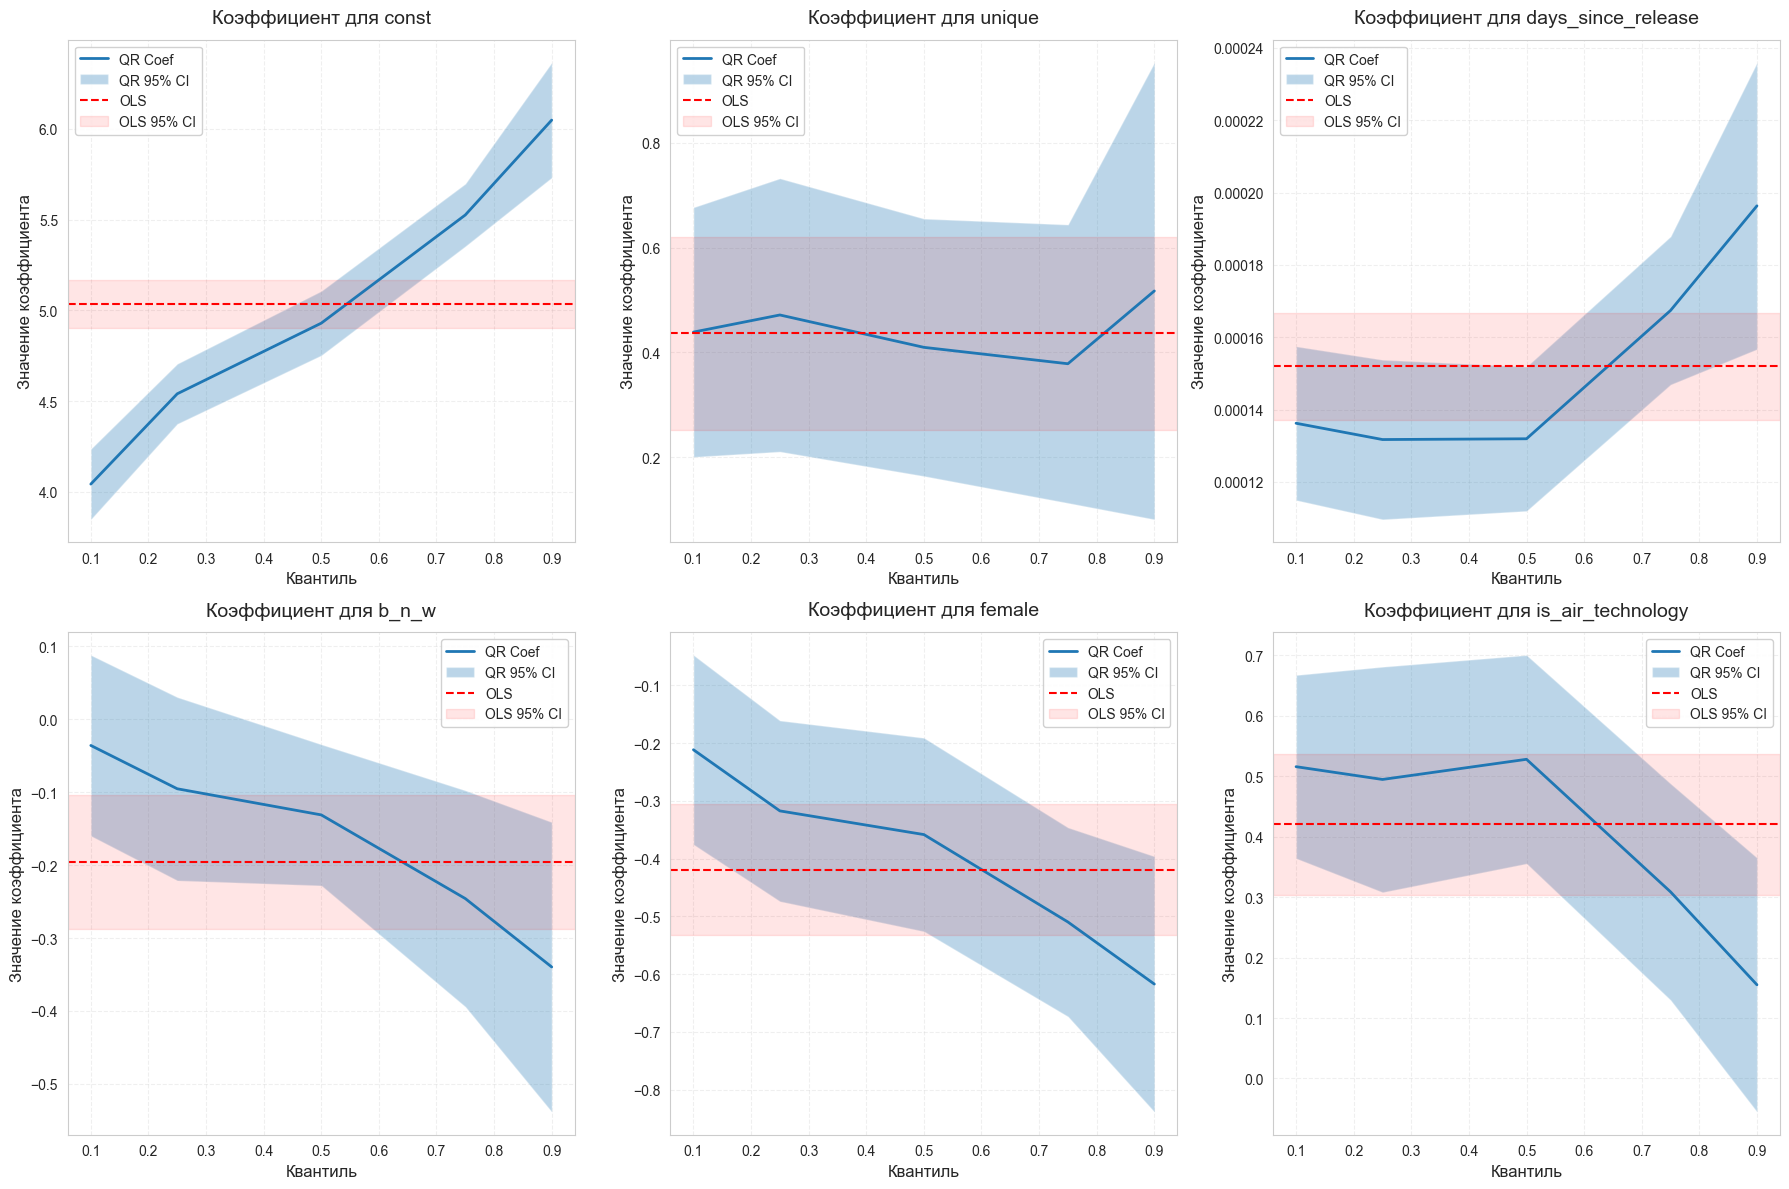

In [79]:
# Графики для каждого предиктора
predictors = features.copy()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, pred in enumerate(predictors):
    ax = axes[i]
    ols_pred_name = pred # if pred != 'intercept' else 'Intercept'

    # Квантильная регрессия
    sns.lineplot(data=plot_data, x='quantile', y=pred, ax=ax,
                label='QR Coef', linewidth=2)
    ax.fill_between(plot_data['quantile'],
                   plot_data[f'{pred}_lower'],
                   plot_data[f'{pred}_upper'],
                   alpha=0.3, label='QR 95% CI')
    
    ols_model = OLS(df_new_categorical_wo[target], df_new_categorical_wo[features]).fit(cov_type='HC0')
    ols_conf_int = ols_model.conf_int()

    # OLS для сравнения
    ax.axhline(ols_model.params[ols_pred_name],
              color='red', linestyle='--',
              linewidth=1.5, label='OLS')
    ax.axhspan(ols_conf_int.loc[ols_pred_name, 0],
              ols_conf_int.loc[ols_pred_name, 1],
              color='red', alpha=0.1, label='OLS 95% CI')
    
    # Настройки графика
    ax.set_title(f'Коэффициент для {pred}', fontsize=14, pad=12)
    ax.set_xlabel('Квантиль', fontsize=12)
    ax.set_ylabel('Значение коэффициента', fontsize=12)
    ax.legend(fontsize=10, framealpha=0.9)
    ax.grid(True, linestyle='--', alpha=0.3)

# Удаляем лишние оси
for j in range(len(predictors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Протестируем две гипотезы:
1. Гипотеза о том, что "уникальность" пары кроссовок больше влияет на цену более дорогих кроссовок (сравним квантили 0.1 и 0.9)
2. Ранее в обычной МНК модели мы увидели, что коэффициент перед b_n_w значимый и отрицательный. Предполагаем, что такие базовые цвета больше удешевляют более дорогие кроссовки, чем более дешевые (также сравним кванитили 0.1 и 0.9)

In [ ]:
from scipy import stats

coef_01 = models_mq[0].params['unique']
coef_09 = models_mq[-1].params['unique'] 

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['unique'] 
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['unique']

diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2) 

wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat))) 

print("\nТест равенства коэффициентов при unique для квантилей 0.1 и 0.9:")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность коэффициентов: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nЗаключение: Отвергаем нулевую гипотезу (p={p_value:.4f} < {alpha}). Коэффициенты статистически значимо различаются.")
else:
    print(f"\nЗаключение: Не отвергаем нулевую гипотезу (p={p_value:.4f} >= {alpha}). Нет доказательств различия коэффициентов.")
     


Тест равенства коэффициентов при unique для квантилей 0.1 и 0.9:
Коэффициент для q=0.1: 0.4389 (std err: 0.1214)
Коэффициент для q=0.9: 0.5173 (std err: 0.2221)
Разность коэффициентов: -0.0784 (std err: 0.2531)
Wald statistic: -0.3099
P-value: 0.7567

Заключение: Не отвергаем нулевую гипотезу (p=0.7567 >= 0.05). Нет доказательств различия коэффициентов.


In [112]:
coef_01 = models_mq[0].params['b_n_w']
coef_09 = models_mq[-1].params['b_n_w']

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['b_n_w'] 
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['b_n_w'] 

diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2)

wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("\nТест равенства коэффициентов при b_n_w для квантилей 0.1 и 0.9:")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность коэффициентов: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nЗаключение: Отвергаем нулевую гипотезу (p={p_value:.4f} < {alpha}). Коэффициенты статистически значимо различаются.")
else:
    print(f"\nЗаключение: Не отвергаем нулевую гипотезу (p={p_value:.4f} >= {alpha}). Нет доказательств различия коэффициентов.")
     


Тест равенства коэффициентов при b_n_w для квантилей 0.1 и 0.9:
Коэффициент для q=0.1: -0.0358 (std err: 0.0633)
Коэффициент для q=0.9: -0.3397 (std err: 0.1014)
Разность коэффициентов: 0.3039 (std err: 0.1196)
Wald statistic: 2.5417
P-value: 0.0110

Заключение: Отвергаем нулевую гипотезу (p=0.0110 < 0.05). Коэффициенты статистически значимо различаются.


In [91]:
features

['const',
 'unique',
 'days_since_release',
 'b_n_w',
 'female',
 'is_air_technology']

Теперь придумаем свой товар и спрогнозируем цену на него

Пусть мы хотим узнать, сколько стоили бы мужские кроссовки, выпущенные ровно год назад (365 дней), в белом цвете, не являющиеся уникальными и произведенные без Air-технологии 

In [99]:
x0 = [1, 0, 365, 1, 0, 0]

pred = res_wo.predict(x0)
np.exp(pred)

array([133.66210748])

Так как наша модель не прошла тест на нормальность остатков, чтобы получить более точную оценку + доверительный интервал, воспользуемся бутстрапом:

In [106]:
from sklearn.utils import resample

X, y = df_new_categorical_wo[features], df_new_categorical_wo[target]

n_boot = 100000
bootstrap_preds = []

for _ in range(n_boot):
    X_resampled, y_resampled = resample(X, y)
    model_boot = OLS(y_resampled, X_resampled).fit(cov_type='HC0')
    mu_boot = model_boot.predict(x0)[0]
    y_boot = np.exp(mu_boot)
    bootstrap_preds.append(y_boot)

lower = np.percentile(bootstrap_preds, 2.5)
upper = np.percentile(bootstrap_preds, 97.5)
print(f"Доверительный интервал: [{lower:.2f}, {upper:.2f}]")

Доверительный интервал: [117.43, 152.71]


In [107]:
np.mean(bootstrap_preds)

134.07028500128294